<h2>Analyst: John Joseph A. Israel</h2>
<hr>
<h1><i> TITANIC SURVIVABILITY PREDICTIVE ANALYTICS USING <br>CLASSIFICATION MACHINE LEARNING MODELS </i></h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv("C:/Users/coedy/Desktop/Project6/Titanic.csv") 
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = titanic[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = titanic.dropna()

# Encode categorical variables
df["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = titanic["Embarked"].map({"C": 0, "Q": 1, "S": 2})

print(df)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name  Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                              McCarthy, Mr. Timothy J    0  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                            Bonnell, Miss. Elizabeth    1  58.0      0   
..                                                 ...  ...   ...    ...   
871   Beckw

In [4]:
X = df[["Pclass", "Sex", "Age", "Embarked"]]
y = df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [5]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8378378378378378


<h3>Accuracy Result</h3>
<hr>
<p>When the result of the accuracy is above 0.6 it means the model 
<p> </p>is picking up patterns - it is now LEARNING

<h1>Feature Selection </h1>

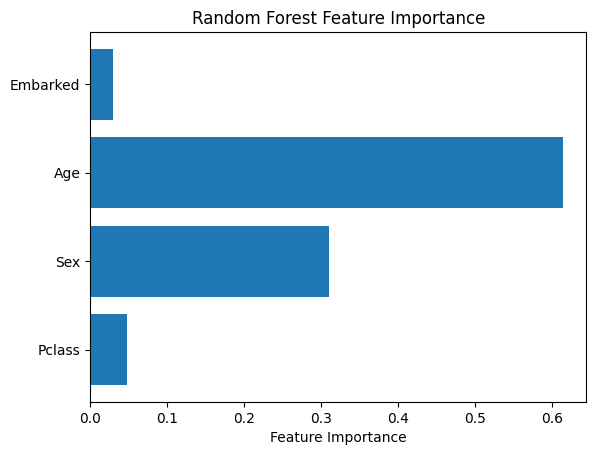

In [6]:
importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

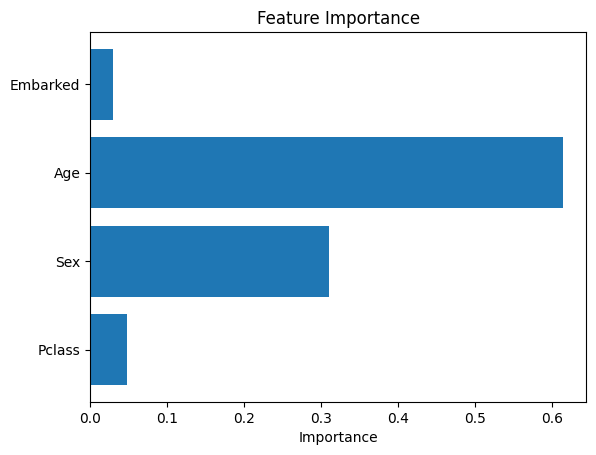

In [7]:
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

# CONFUSION MATRIX

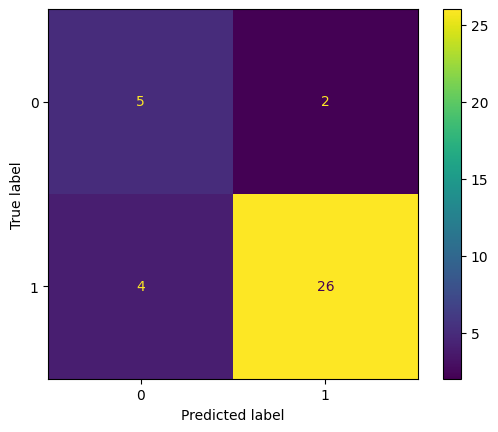

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# PRACTICAL APPLICATION

# Feature Legend:
<p> Pclass (Passenger Class):
<p>   1 = 1st Class (Rich passengers, luxury cabins)
<p>  2 = 2nd Class (Middle-class, comfortable, less luxurious)
<p>  3 = 3rd Class (Lower-class, cheapest accommodations)
<p>
<p> - Sex:
<p>   0 = MALE
<p>   1 = FEMALE
<p>
<p> - Age: Passenger's age
<p> 
<p> - Embarked (Port of Embarkation):
<p>   0 = Cherbourg
<p>   1 = Queenstown
<p>   2 = Southampton





In [9]:
print(X.columns)

Index(['Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')


In [10]:
pred = model.predict(pd.DataFrame([[3, 0, 22, 0]],
                                  columns=['Pclass', 'Sex', 'Age', 'Embarked']))

print("Survived" if pred[0] == 1 else "Did NOT Survive")

Did NOT Survive


In [11]:
passenger1 = pd.DataFrame({'Pclass': [3], 'Sex': [0], 'Age': [30], 'Embarked': [1]})

# Passenger 2: 1st class female, 30 years old, embarked at Cherbourg
passenger2 = pd.DataFrame({'Pclass': [1], 'Sex': [1], 'Age': [30], 'Embarked': [0]})

pred1 = model.predict(passenger1)[0]
pred2 = model.predict(passenger2)[0]

# Output results
if pred1 == 1:
    print("Passenger 1 likely survive")
elif pred2 == 0:
    print("Passenger 2 unlikely to survive")
else:
    print("Invalid Result")

Invalid Result


<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [12]:
df2 = pd.read_csv("C:/Users/coedy/Desktop/Project6/Titanic.csv")
print(df2)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [13]:
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()

print(df2)

# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})

print(df2)

     Survived  Pclass     Sex   Age     Fare Embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
885         0       3  female  39.0  29.1250        Q
886         0       2    male  27.0  13.0000        S
887         1       1  female  19.0  30.0000        S
889         1       1    male  26.0  30.0000        C
890         0       3    male  32.0   7.7500        Q

[712 rows x 6 columns]
     Survived  Pclass  Sex   Age     Fare  Embarked
0           0       3    0  22.0   7.2500         0
1           1       1    1  38.0  71.2833         1
2           1       3    1  26.0   7.9250         0
3           1       1    1  35.0  53.1000         0
4           0       3    0  35.0   8.0500         0
..        ...   

<h1>selecting X and y </h1>

In [14]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


In [15]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7808988764044944


<h1> Manual Testing </h1>

In [18]:
passenger = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],
    'Age': [22],
    'Fare': [7.25],
    'Embarked': [0]
})

prediction = model.predict(passenger)[0]

if prediction == 1:
    print("Passenger likely survive")
else:
    print("Passenger unlikely to survive")

Passenger likely survive
